In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('covid_data.csv', header = 0, delimiter=',', encoding='unicode_escape')
df.head(10)

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older
0,AFG,Afghanistan,Asia,55733,1431.682,2444,62.782,38928341,1.337
1,ALB,Albania,Europe,107931,37504.691,1816,631.038,2877800,8.643
2,DZA,Algeria,Africa,113255,2582.721,2987,68.117,43851043,3.857
3,AGO,Angola,Africa,20854,634.511,508,15.457,32866268,1.362
4,ATG,Antigua and Barbuda,North America,769,7852.708,14,142.962,97928,4.631
5,ARG,Argentina,South America,2112023,46730.539,52077,1152.254,45195777,7.441
6,ARM,Armenia,Asia,172216,58117.584,3195,1078.214,2963234,7.571
7,AUS,Australia,Oceania,28986,1136.711,909,35.647,25499881,10.129
8,AUT,Austria,Europe,460849,51169.058,8574,951.990,9006400,13.748
9,AZE,Azerbaijan,Asia,234662,23144.092,3223,317.876,10139175,3.871


In [4]:
#kích cỡ của file dữ liệu
df.shape

(173, 9)

In [5]:
# Tổng thế dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  173 non-null    object 
 1   location                  173 non-null    object 
 2   continent                 173 non-null    object 
 3   total_cases               173 non-null    int64  
 4   total_cases_per_million   173 non-null    float64
 5   total_deaths              173 non-null    int64  
 6   total_deaths_per_million  173 non-null    float64
 7   population                173 non-null    int64  
 8   aged_70_older             173 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [6]:
# Loại bỏ dữ liệu trống trên 1 dòng
df.dropna(how='all', inplace=True)

In [7]:
#Loai bo dong du lieu trung nhau
df.drop_duplicates(inplace=True)

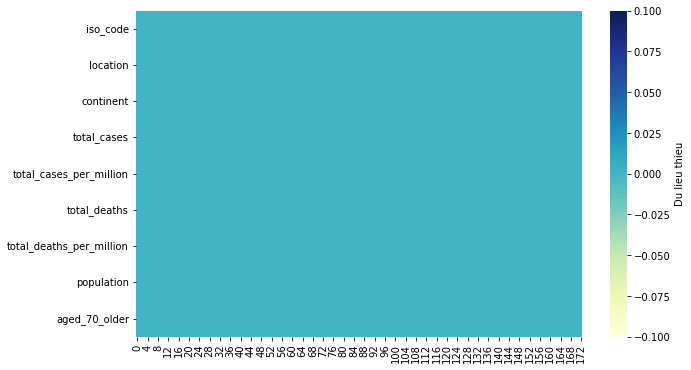

In [8]:


# Kiểm tra dòng dữ liệu thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu', cbar_kws={'label': 'Du lieu thieu'})
plt.savefig('missingdata.png', dpi=100)

In [26]:
#Tổng số ca nhiễm
sum(df['total_cases'])

113863086

In [9]:
#Tổng số ca tử vong
sum(df['total_deaths'])

2532633

<AxesSubplot:xlabel='continent', ylabel='total_cases'>

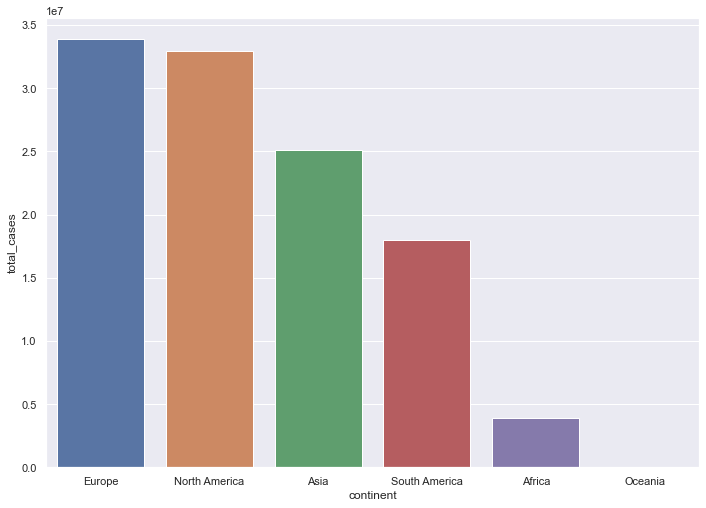

In [44]:
# Số lượng ca nhiễm theo châu lục
sns.set(rc={'figure.figsize':(11.7,8.27)})
groupedvalues_c = df.groupby('continent').sum().reset_index().sort_values(by='total_cases', ascending=False)
sns.barplot(x="continent", y='total_cases', data=groupedvalues_c, ci=0)

In [43]:
groupedvalues_c = df.groupby('continent').sum().sort_values(by='total_cases', ascending=False).reset_index()
groupedvalues_c

,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older,the_older
0,Europe,33883270,2024851.383,811247,41065.446,739243734,459.074,91778669.0
1,North America,32924592,429454.451,749089,8956.209,587538337,117.551,46048564.0
2,Asia,25090189,829802.955,399483,8598.432,4574578124,174.762,214468459.0
3,South America,18026103,332650.390,467842,9136.495,430457607,62.232,22200791.0
4,Africa,3906140,258930.151,104021,4953.136,1338826591,117.834,27050443.0
5,Oceania,32792,1849.054,951,44.835,40165585,25.275,3272688.0


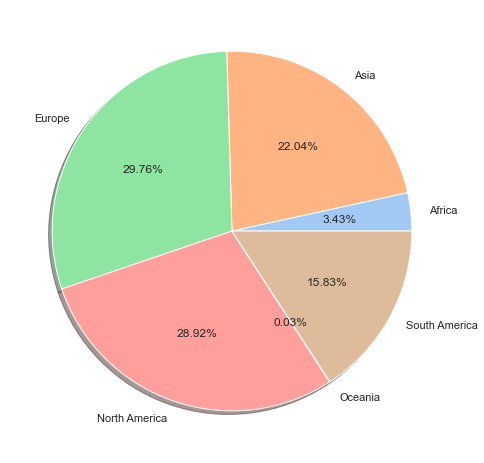

In [11]:
# Phần trăm số lượng ca nhiễm
gb_d = df.groupby(['continent'])['total_cases'].agg(['sum'])
labels = gb_d.index
data = list(gb_d['sum'])
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

In [47]:
groupedvalues_d = df.groupby('continent').sum().sort_values(by='total_deaths', ascending=False).reset_index()
groupedvalues_d

,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older,the_older
0,Europe,33883270,2024851.383,811247,41065.446,739243734,459.074,91778669.0
1,North America,32924592,429454.451,749089,8956.209,587538337,117.551,46048564.0
2,South America,18026103,332650.390,467842,9136.495,430457607,62.232,22200791.0
3,Asia,25090189,829802.955,399483,8598.432,4574578124,174.762,214468459.0
4,Africa,3906140,258930.151,104021,4953.136,1338826591,117.834,27050443.0
5,Oceania,32792,1849.054,951,44.835,40165585,25.275,3272688.0


<AxesSubplot:xlabel='continent', ylabel='total_deaths'>

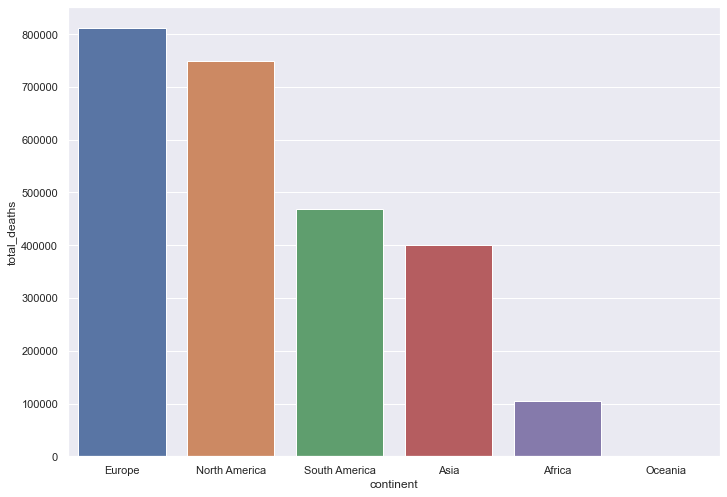

In [46]:
# Số lượng ca tử vong châu lục
sns.set(rc={'figure.figsize':(11.7,8.27)})
groupedvalues_d = df.groupby('continent').sum().sort_values(by='total_deaths', ascending=False).reset_index()
sns.barplot(x="continent", y='total_deaths', data=groupedvalues_d, ci=0)

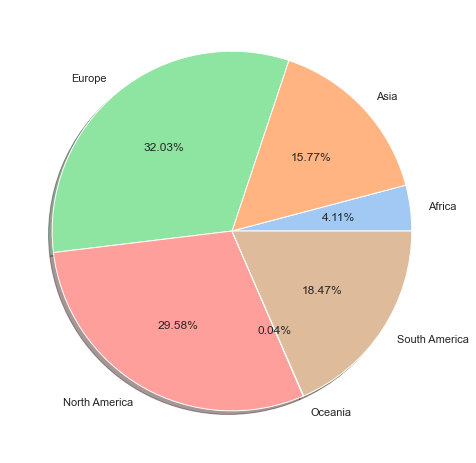

In [13]:
# Phần trăm số lượng ca tử vong
gb_d = df.groupby(['continent'])['total_deaths'].agg(['sum'])
labels = gb_d.index
data = list(gb_d['sum'])
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

In [48]:
# Top 10 quốc gia có số ca nhiễm cao nhất
df_d = df.sort_values(by='total_cases', ascending=False)
df_d = df_d.head(10)
df_d

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older,the_older
165,USA,United States,North America,28637235,86516.634,514810,1555.305,331002647,9.732,32213178.0
73,IND,India,Asia,11124527,8061.226,157248,113.947,1380004385,3.414,47113350.0
22,BRA,Brazil,South America,10587001,49807.256,255720,1203.052,212559409,5.060,10755506.0
130,RUS,Russia,Europe,4209850,28847.539,85025,582.625,145934460,9.393,13707624.0
164,GBR,United Kingdom,Europe,4194289,61784.297,123187,1814.616,67886004,12.527,8504080.0
57,FRA,France,Europe,3820369,58528.626,86955,1332.164,65273512,13.079,8537123.0
146,ESP,Spain,Europe,3204531,68539.105,69609,1488.810,46754783,13.799,6451693.0
79,ITA,Italy,Europe,2938371,48598.779,97945,1619.948,60461828,16.240,9819001.0
160,TUR,Turkey,Asia,2711479,32149.739,28638,339.558,84339067,5.061,4268400.0
61,DEU,Germany,Europe,2455569,29308.348,70514,841.617,83783945,15.957,13369404.0


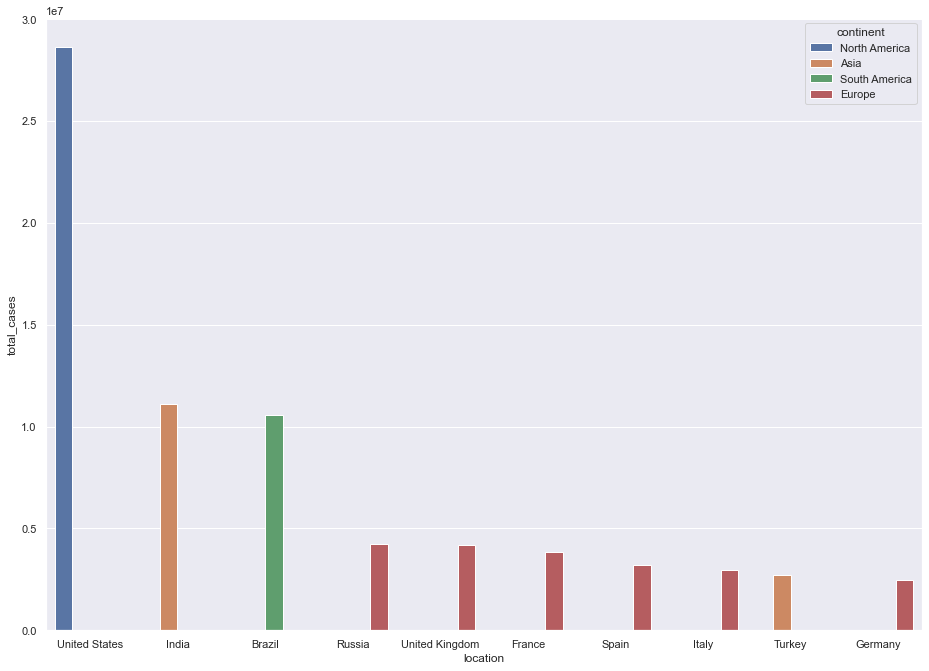

In [35]:
# Biểu đồ chart thể hiện 10 quốc gia có số ca nhiễm cao nhất
sns.barplot(x="location", y='total_cases',hue='continent', data=df_d, ci=None)
sns.set(rc={'figure.figsize':(15.7,11.27)})

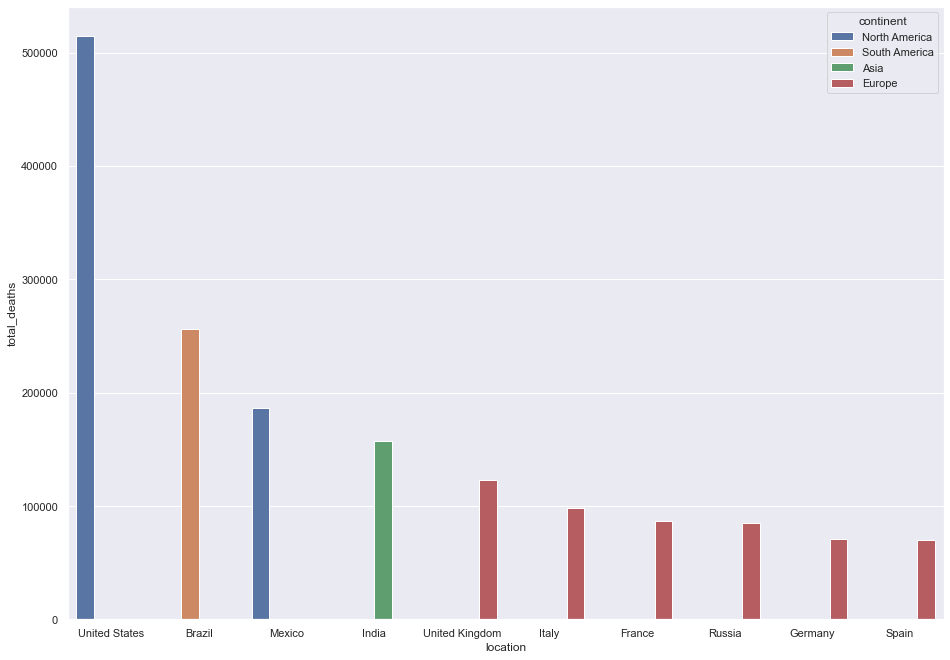

In [36]:
# Top 10 quốc gia có số ca  tử vong cao nhất
df_d = df.sort_values(by='total_deaths', ascending=False)
df_d = df_d.head(10)
# Biểu đồ chart thể hiện 10 quốc gia có số ca tử vong cao nhất
sns.barplot(x="location", y='total_deaths',hue='continent', data=df_d, ci=None)
sns.set(rc={'figure.figsize':(15.7,11.27)})

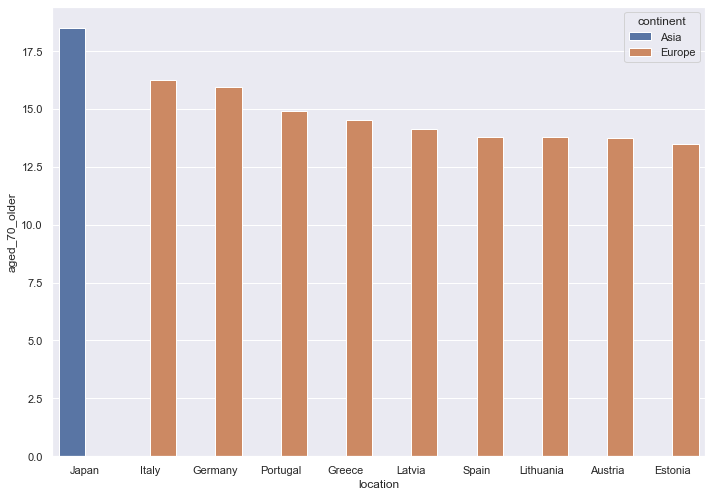

In [49]:
# Top 10 quốc gia có tỷ lệ dân số trên 70 tuổi
df_d = df.sort_values(by='aged_70_older', ascending=False)
df_d = df_d.head(10)
# Biểu đồ chart thể hiện 10 quốc gia có số ca tử vong cao nhất
sns.barplot(x="location", y='aged_70_older',hue='continent', data=df_d, ci=None)
sns.set(rc={'figure.figsize':(15.7,11.27)})

In [38]:
#Top 5 quốc gia có số ca nhiễm thấp nhất
data_asc = df.sort_values(by='total_cases')
bottom_5th = data_asc.head(5)
bottom_5th[['location','total_cases']]

,location,total_cases
55,Fiji,59
64,Grenada,148
23,Brunei,186
155,Tanzania,509
101,Mauritius,619


In [39]:
#Top 5 quốc gia có số ca nhiễm thấp nhất
data_asc = df.sort_values(by='total_deaths')
bottom_death_5th = data_asc.head(5)
bottom_death_5th[['location','total_deaths']]

,location,total_deaths
64,Grenada,1
18,Bhutan,1
55,Fiji,2
104,Mongolia,2
26,Burundi,3


In [15]:
# Thêm cột số lượng người già
df['the_older'] = round(df['aged_70_older']*df['population']/100)
df

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older,the_older
0,AFG,Afghanistan,Asia,55733,1431.682,2444,62.782,38928341,1.337,520472.0
1,ALB,Albania,Europe,107931,37504.691,1816,631.038,2877800,8.643,248728.0
2,DZA,Algeria,Africa,113255,2582.721,2987,68.117,43851043,3.857,1691335.0
3,AGO,Angola,Africa,20854,634.511,508,15.457,32866268,1.362,447639.0
4,ATG,Antigua and Barbuda,North America,769,7852.708,14,142.962,97928,4.631,4535.0
...,...,...,...,...,...,...,...,...,...,...
168,VEN,Venezuela,South America,139545,4907.346,1348,47.405,28435943,3.915,1113267.0
169,VNM,Vietnam,Asia,2448,25.149,35,0.360,97338583,4.718,4592434.0
170,YEM,Yemen,Asia,2310,77.449,634,21.257,29825968,1.583,472145.0
171,ZMB,Zambia,Africa,79002,4297.334,1098,59.726,18383956,1.542,283481.0


In [16]:
# Phân tích tương quan giữa các đại lượng: số ca chết, số ca nhiễm, số lượng người già, dân số
df[['total_deaths','total_cases','the_older','population']].corr()

,total_deaths,total_cases,the_older,population
total_deaths,1.000000,0.957344,0.428411,0.334057
total_cases,0.957344,1.000000,0.458933,0.383323
the_older,0.428411,0.458933,1.000000,0.925020
population,0.334057,0.383323,0.925020,1.000000


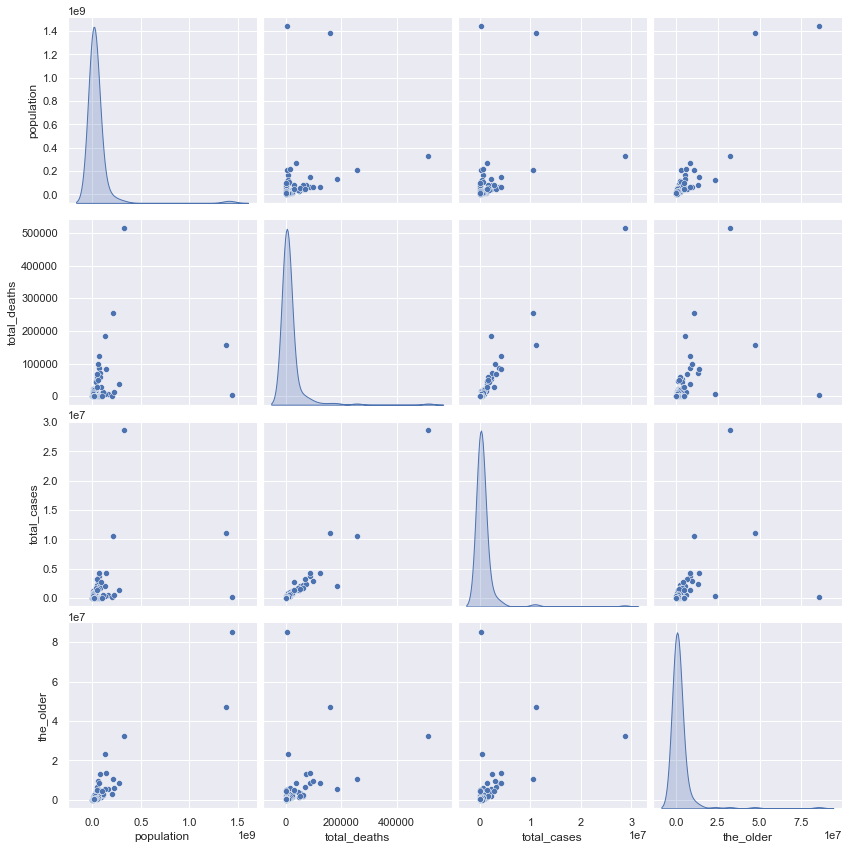

In [17]:
sns.pairplot(data=df[['population','total_deaths', 'total_cases', 'the_older']],diag_kind='kde',height=3)

In [18]:
# Xây dựng bài toán hồi quy đa biến dự báo số lượng ca tử vong dựa trên dân số, số ca nhiễm và số người trên 70 tuổi
X = df[['total_cases','the_older','population']].values
y = df[['total_deaths']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
from sklearn import linear_model

model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
#Châm điểm mô hình:
print('Score: ',model.score(X_train,y_train))
print('Score: ',model.score(X_test,y_test))

Score:  0.9202210442083738
Score:  0.8764259380042306


In [21]:
#Xây dựng công thức toán học của mô hình
model.coef_

array([[ 1.90598701e-02,  4.42106731e-04, -4.15242099e-05]])

In [22]:
model.intercept_

array([2895.58673277])

In [23]:
# Công thức của mô hình: 
# total_deaths = 2895.58673277 + 1.90598701e-02 * total_cases + 4.42106731e-04 * the_older - 4.15242099e-05 * population

<function matplotlib.pyplot.show(close=None, block=None)>

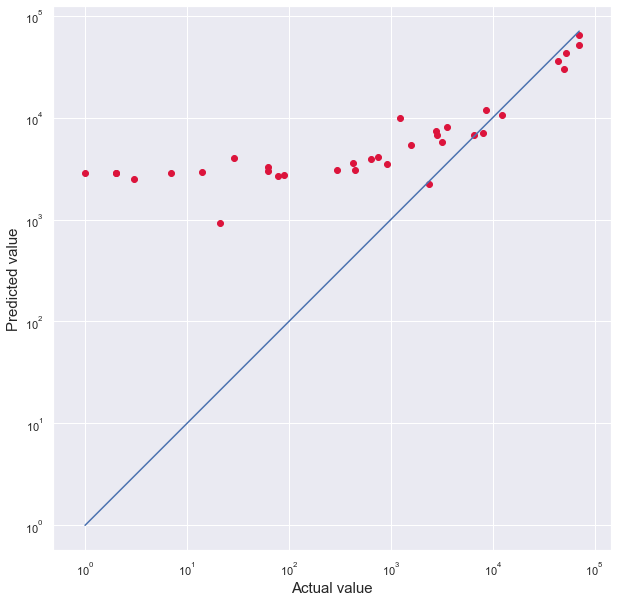

In [24]:
y_test_predicted= model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_predicted,c='crimson' )
plt.yscale('log')
plt.xscale('log')


p1 = max(max(abs(y_test_predicted)),max(abs(y_test)))
p2 = min(min(abs(y_test_predicted)),min(abs(y_test)))

plt.plot([p1,p2],[p1,p2],"b-")

plt.xlabel('Actual value', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)

plt.axis('equal')
plt.show

In [25]:
import pickle 
pickle.dump(model,open('mymodel.sav','wb'))